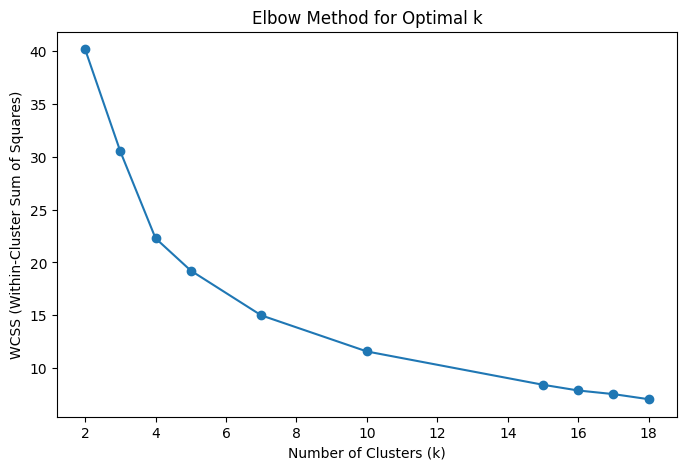

Silhouette Score: 0.4328
Davies-Bouldin Index: 1.0059
Calinski-Harabasz Score: 950.8922


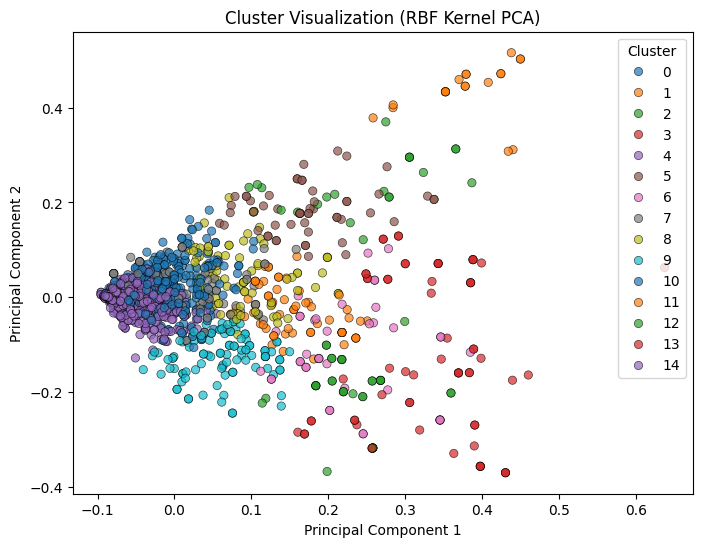

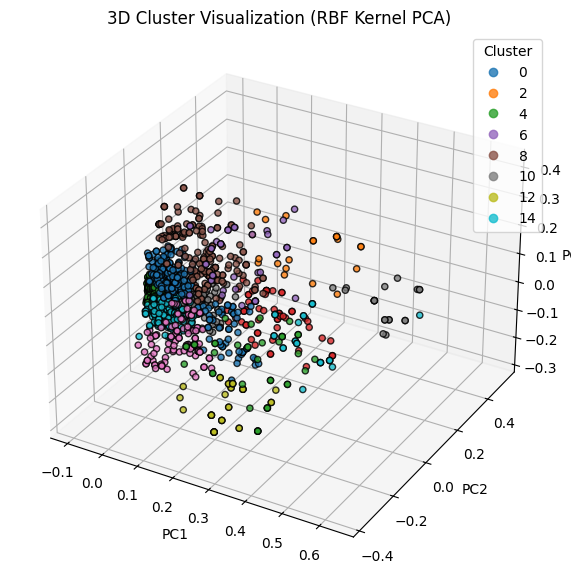

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import rbf_kernel

# Load dataset
file_path = "dataset.csv"
df = pd.read_csv(file_path)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[np.number])

# Handle missing values using KNN Imputation
imputer = KNNImputer(n_neighbors=5)
df_numeric[:] = imputer.fit_transform(df_numeric)

# Standardize the dataset
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Apply Kernel PCA with RBF Kernel
kpca = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)  # Adjust gamma for cluster tightness
pca_result = kpca.fit_transform(df_scaled)

# Ensure row count consistency
assert pca_result.shape[0] == df_numeric.shape[0], "Row mismatch after Kernel PCA!"

# Determine optimal k using Elbow Method
wcss = []
k_values = [2, 3, 4, 5, 7, 10, 15, 16, 17, 18]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()

# Apply K-Means with chosen k
optimal_k = 10  # Adjust based on the elbow method
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans_final.fit_predict(pca_result)

# Assign clusters to df_numeric
df_numeric["Cluster"] = clusters.flatten()

# Evaluate clustering performance in transformed space
silhouette_avg = silhouette_score(pca_result, clusters)
davies_bouldin = davies_bouldin_score(pca_result, clusters)
calinski_harabasz = calinski_harabasz_score(pca_result, clusters)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
print(f"Calinski-Harabasz Score: {calinski_harabasz:.4f}")

# Reduce PCA to 2D for visualization
pca_visual_2d = KernelPCA(n_components=2, kernel='rbf', gamma=0.1)
pca_2d = pca_visual_2d.fit_transform(df_scaled)

df_pca_2d = pd.DataFrame(pca_2d, columns=['PC1', 'PC2'])
df_pca_2d['Cluster'] = clusters

# Plot clusters in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca_2d, x='PC1', y='PC2', hue='Cluster', palette='tab10', alpha=0.7, edgecolor="black")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Visualization (RBF Kernel PCA)')
plt.legend(title='Cluster')
plt.show()

# Reduce PCA to 3D for better visualization
pca_visual_3d = KernelPCA(n_components=3, kernel='rbf', gamma=0.1)
pca_3d = pca_visual_3d.fit_transform(df_scaled)

df_pca_3d = pd.DataFrame(pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Cluster'] = clusters

# Plot clusters in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df_pca_3d['PC1'], df_pca_3d['PC2'], df_pca_3d['PC3'], 
                     c=df_pca_3d['Cluster'], cmap='tab10', alpha=0.8, edgecolor="black")

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('3D Cluster Visualization (RBF Kernel PCA)')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

# Save the clustered dataset
df_numeric.to_csv("clustered_dataset.csv", index=False)


In [47]:

from scipy import stats

# Load the dataset
file_path = "clustered_dataset.csv"
df = pd.read_csv(file_path)

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64']).columns
numerical_data = df[numerical_cols]

# Compute Z-scores
z_scores = np.abs(stats.zscore(numerical_data, nan_policy='omit'))

# Set threshold (commonly 3)
threshold = 3

# Identify outlier positions (True if outlier)
outlier_mask = z_scores > threshold

# Count the number of outliers per column and convert to Pandas Series for sorting
outlier_counts = pd.Series(outlier_mask.sum(axis=0), index=numerical_cols)

# Extract rows containing at least one outlier
outlier_rows = df[outlier_mask.any(axis=1)]  # Include all columns, not just numerical ones

# Save outliers to CSV
outlier_rows.to_csv("D:/Downloads/ojt/outliers.csv", index=False)

# Display outlier summary
print("Number of outliers per column:")
print(outlier_counts.sort_values(ascending=False))

print("\nRows containing outliers saved to 'outliers.csv'.")


Number of outliers per column:
I8.5:OTHERS       152
I7.5:OTHERS       129
J3:BOAT_DESIGN    111
J5.1               76
J2:BOAT_TYPE       71
NY_W/BOAT          58
J7.2               51
J5.5               43
I3:???             39
J5.2               38
J5.7               38
J7.3               37
J6.2               34
J6.6               34
J6.1               33
J5.4               33
J7.4               32
J6.4               24
J6.3               20
J6.5               19
I6.4:H&L            3
J4:BOAT_COND        2
I6.2:FT             1
B3:AGE              1
I6.3:PPN            1
J4: REASON-NO       1
I7.4:CP             1
I8.2:FISH_R         1
I7.3:F_LIGHT        1
I8.1:BAD_W          1
I7.1:LIFE_J         0
I6.5:OTHERS         0
I6.1:GN             0
I7.2:LIFE_B         0
J1:BOAT_AGREE       0
I8.3:BOAT_P         0
BOAT_COND           0
J5.3                0
J5.6                0
J7.1                0
J7.5                0
dtype: int64

Rows containing outliers saved to 'outliers.csv'.


In [48]:
df_numeric["Cluster"].value_counts()

Cluster
0    2117
2       6
1       6
Name: count, dtype: int64

In [49]:
# Compute the mean of each variable per cluster
cluster_summary = df_numeric.groupby("Cluster").mean()
print(cluster_summary)


            B3:AGE    I3:???   I6.1:GN   I6.2:FT  I6.3:PPN  I6.4:H&L  \
Cluster                                                                
0        48.332228  1.196598  0.532609  0.116257  0.122873   0.63516   
1        44.000000  2.000000  0.000000  0.000000  0.000000   1.00000   
2        51.000000  1.000000  1.000000  0.000000  0.000000   0.00000   

         I6.5:OTHERS  I7.1:LIFE_J  I7.2:LIFE_B  I7.3:F_LIGHT  ...      J6.2  \
Cluster                                                       ...             
0           0.112949     0.307655      0.14792      0.846409  ...  4.185442   
1           0.000000     0.000000      0.00000      1.000000  ...  4.600000   
2           0.000000     0.000000      0.00000      1.000000  ...  2.800000   

             J6.3      J6.4      J6.5      J6.6      J7.1    J7.2      J7.3  \
Cluster                                                                       
0        4.516542  4.542532  4.520137  4.466165  3.052574  4.3379  4.359834   
1     